<a href="https://colab.research.google.com/github/Benjamilior/proyecy_miner_02/blob/main/Proyecto_Mineria_Programa_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ingresa ID de la cancion que buscas

In [2]:
# !pip install opencv-contrib-python

In [3]:
# !pip install opencv-python

In [4]:
# !pip install --user <package>

In [5]:
# !pip install requests

In [6]:
import base64
import requests
import datetime
from urllib.parse import urlencode
import json
id_cancion = input(str("Ingresa el ID de tu cancion"))

Ingresa el ID de tu cancion6OufwUcCqo81guU2jAlDVP


In [7]:
client_id = '7b99efc27dcd47cbb18d6b9929ebdcda'
client_secret = '64b765c9c7de4bf4ac9829b77e61ea54'

In [8]:
class SpotifyAPI(object):
    access_token = None
    access_token_expires = datetime.datetime.now()
    access_token_did_expires = True
    client_id = None
    client_secret = None
    token_url = 'https://accounts.spotify.com/api/token'
    
    
    def __init__(self, client_id, client_secret, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.client_id = client_id
        self.client_secret = client_secret
        
    def get_client_credentials(self):
        '''
        Returns a base64 encoded string
        '''
        client_id = self.client_id
        client_secret = self.client_secret
        if client_secret == None or client_id == None:
            raise Exception('You Must Set client_id and client_secret')
        client_creds = f'{client_id}:{client_secret}'
        client_creds_b64 = base64.b64encode(client_creds.encode())
        return client_creds_b64.decode()
        
    def get_token_headers(self):
        
        client_creds_b64 = self.get_client_credentials()
        return {
            'Authorization': f'Basic {client_creds_b64}'
        }
                
    def get_token_data(self):
        return {
            'grant_type': 'client_credentials'
        }
                
    def perform_auth(self):
        token_url = self.token_url
        token_data = self.get_token_data()
        token_headers = self.get_token_headers()
        r = requests.post(token_url, data=token_data, headers=token_headers)
        if r.status_code not in range (200, 299): 
            return False
        data = r.json()
        now = datetime.datetime.now()
        access_token = data['access_token']
        expires_in = data['expires_in'] # seconds
        expires = now + datetime.timedelta(seconds=expires_in)
        self.access_token = access_token
        self.access_token_expires = expires
        self.access_token_did_expires = expires < now 
        return True



In [9]:
spotify = SpotifyAPI(client_id, client_secret)

In [10]:
spotify.perform_auth()

True

In [11]:
access_token = "BQDT4Wj10RUxzvkdhday9CvdMBJ3vnEyIFA34urIpGZkKmnpSB3_NLbe6QegG0IoAP6u2W8s9qeznAguBmxRglRF0cC2kaTA6V00rj3Qhni-jUmYuBg0VXEZJ5rO6dWizJcL4aFfb9PNuMKSnlCDNQ"
print(access_token)

BQDT4Wj10RUxzvkdhday9CvdMBJ3vnEyIFA34urIpGZkKmnpSB3_NLbe6QegG0IoAP6u2W8s9qeznAguBmxRglRF0cC2kaTA6V00rj3Qhni-jUmYuBg0VXEZJ5rO6dWizJcL4aFfb9PNuMKSnlCDNQ


In [12]:
headers = {
    'Authorization' : f'Bearer {access_token}'
}
endpoint = 'https://api.spotify.com/v1/audio-features'
data = urlencode({"ids": id_cancion, "type": "audio-feature"})
print (data)


lookup_url = f'{endpoint}?{data}'
print (lookup_url)
r = requests.get(lookup_url, headers=headers)
print(r.status_code)

ids=6OufwUcCqo81guU2jAlDVP&type=audio-feature
https://api.spotify.com/v1/audio-features?ids=6OufwUcCqo81guU2jAlDVP&type=audio-feature
200


In [13]:
import pandas
import json
import pandas as pd
import csv
r.json()
rjson1 = r.json()
rjson2 = rjson1['audio_features']
rjson3 = json.dumps(rjson2)
rjson4 = json.loads(rjson3)
rjson5 = rjson4[0]
rjson6 = pd.DataFrame(rjson5, index=[0])
rjson6
# rjson6
#rjson4
#Modo Texto
# rjson3 = json.dumps(rjson2)
# rjson3.get('energy')









,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.727,0.681,5,-7.114,0,0.0265,0.00214,0.000307,0.0861,0.448,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4


# Manipulando los Datos 01/Aplicando K-Means/Probando con menos celdas/ Funciona, no tocar/ NUMERO 2



In [15]:
rjson6
index = ['0']
ke = ['0']
X = ['0']
rjson6['index'] = X
rjson6['Unnamed: 0'] = ke
rjson6['X'] = X
rjson6['sourcefilename'] = "Cualquier cosa"
nombre_columnas = ['index', 'Unnamed: 0','X','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','type','id','uri','track_href', 'analysis_url','duration_ms','time_signature','sourcefilename']
rjson6 = rjson6[nombre_columnas]
rjson7 = rjson6





In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
#Lista va de 0 - 15 #
url_song = ['https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/Song_01.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/Song_02.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_03.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_04.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_05.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song06.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song07.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song08.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song09.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song10.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song11.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song12.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song13.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song14.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song15.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song16.csv']
#Merge CSV
mergedata = pd.concat(pd.read_csv(url_song).assign(sourcefilename = url_song)for url_song in url_song)
mergedata = mergedata.reset_index()
mergedata = pd.concat([mergedata, rjson7])
mergedata = mergedata.reset_index()
mergedata









,level_0,index,Unnamed: 0,X,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,sourcefilename
0,0,0,1,0,0.542,0.659,8,-7.289,1,0.0389,...,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,4,https://raw.githubusercontent.com/Benjamilior/...
1,1,1,2,1,0.727,0.681,5,-7.114,0,0.0265,...,0.448,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,https://raw.githubusercontent.com/Benjamilior/...
2,2,2,3,2,0.613,0.783,1,-6.736,1,0.1380,...,0.379,117.952,audio_features,0h5ddpn03JPxD4x4dMf8i0,spotify:track:0h5ddpn03JPxD4x4dMf8i0,https://api.spotify.com/v1/tracks/0h5ddpn03JPx...,https://api.spotify.com/v1/audio-analysis/0h5d...,138308,4,https://raw.githubusercontent.com/Benjamilior/...
3,3,3,4,3,0.848,0.821,2,-5.408,0,0.0527,...,0.249,125.051,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,https://raw.githubusercontent.com/Benjamilior/...
4,4,4,5,4,0.754,0.763,7,-4.627,0,0.0435,...,0.464,117.953,audio_features,18asYwWugKjjsihZ0YvRxO,spotify:track:18asYwWugKjjsihZ0YvRxO,https://api.spotify.com/v1/tracks/18asYwWugKjj...,https://api.spotify.com/v1/audio-analysis/18as...,164819,4,https://raw.githubusercontent.com/Benjamilior/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,2168,162,163,62,0.706,0.739,4,-5.055,0,0.0962,...,0.571,87.790,audio_features,3kdgsWJBpqqHL3wyQGl26t,spotify:track:3kdgsWJBpqqHL3wyQGl26t,https://api.spotify.com/v1/tracks/3kdgsWJBpqqH...,https://api.spotify.com/v1/audio-analysis/3kdg...,389168,4,https://raw.githubusercontent.com/Benjamilior/...
2169,2169,163,164,63,0.518,0.820,5,-4.268,1,0.1620,...,0.551,168.148,audio_features,2y9oZ18fhOTkHjOhbHbqEI,spotify:track:2y9oZ18fhOTkHjOhbHbqEI,https://api.spotify.com/v1/tracks/2y9oZ18fhOTk...,https://api.spotify.com/v1/audio-analysis/2y9o...,209416,4,https://raw.githubusercontent.com/Benjamilior/...
2170,2170,164,165,64,0.732,0.807,10,-3.424,0,0.1160,...,0.724,176.026,audio_features,6NfC2FKfsfzuLIF4lThw0A,spotify:track:6NfC2FKfsfzuLIF4lThw0A,https://api.spotify.com/v1/tracks/6NfC2FKfsfzu...,https://api.spotify.com/v1/audio-analysis/6NfC...,226379,4,https://raw.githubusercontent.com/Benjamilior/...
2171,2171,165,166,65,0.812,0.855,7,-3.725,1,0.0554,...,0.573,90.040,audio_features,48AJSd42lXpicsGqcgopof,spotify:track:48AJSd42lXpicsGqcgopof,https://api.spotify.com/v1/tracks/48AJSd42lXpi...,https://api.spotify.com/v1/audio-analysis/48AJ...,192477,4,https://raw.githubusercontent.com/Benjamilior/...


Escojiendo Parametros

In [17]:
mergedata_outstr = mergedata.drop(['sourcefilename','analysis_url','track_href','uri','id','type','index','Unnamed: 0','X','duration_ms','speechiness','acousticness','instrumentalness','liveness','key'], axis=1)
# mergedata_outstr.head()
# mergedata_outstr.info()
# mergedata_outstr.describe()



Normalizando Datos

In [18]:
# mergedata_norms = (mergedata_outstr-mergedata_outstr.min())/(mergedata_outstr.max())-(mergedata_outstr.min())
# mergedata_norms.describe()
mergedata_norms = mergedata_outstr

Buscando el K Optimo

In [19]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, max_iter = 300)
  kmeans.fit(mergedata_norms)
  wcss.append(kmeans.inertia_)

  


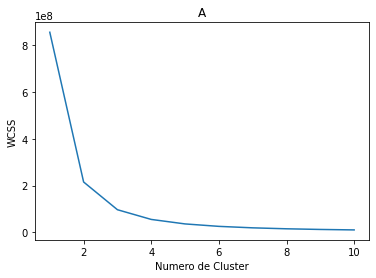

In [20]:
plt.plot(range(1,11), wcss)
plt.title("A")
plt.xlabel("Numero de Cluster")
plt.ylabel("WCSS")
plt.show()

Aplicando el Modelo

In [21]:
clustering = KMeans(n_clusters=9, max_iter=300)
clustering.fit(mergedata_norms)

KMeans(n_clusters=9)

In [22]:
mergedata_norms['Kmeans_Clusters'] = clustering.labels_
mergedata_norms

,level_0,danceability,energy,loudness,mode,valence,tempo,time_signature,Kmeans_Clusters
0,0,0.542,0.659,-7.289,1,0.109,120.122,4,4
1,1,0.727,0.681,-7.114,0,0.448,123.028,4,4
2,2,0.613,0.783,-6.736,1,0.379,117.952,4,4
3,3,0.848,0.821,-5.408,0,0.249,125.051,4,4
4,4,0.754,0.763,-4.627,0,0.464,117.953,4,4
...,...,...,...,...,...,...,...,...,...
2168,2168,0.706,0.739,-5.055,0,0.571,87.790,4,6
2169,2169,0.518,0.820,-4.268,1,0.551,168.148,4,6
2170,2170,0.732,0.807,-3.424,0,0.724,176.026,4,6
2171,2171,0.812,0.855,-3.725,1,0.573,90.040,4,6


Visualizando

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_music = pca.fit_transform(mergedata_norms)
pca_musica_df = pd.DataFrame(data = pca_music, columns=['Componentes_01', 'Componente_02'])
pca_nombres_music = pd.concat([pca_musica_df,mergedata_norms[['Kmeans_Clusters']]],axis=1)
pca_nombres_music


,Componentes_01,Componente_02,Kmeans_Clusters
0,-1085.000732,-1.117405,4
1,-1083.999397,1.791730,4
2,-1083.002726,-3.274423,4
3,-1082.000819,3.853076,4
4,-1081.005883,-3.224872,4
...,...,...,...
2168,1082.976203,-34.516114,6
2169,1084.019612,45.835902,6
2170,1085.022699,53.731016,6
2171,1085.975538,-32.237207,6


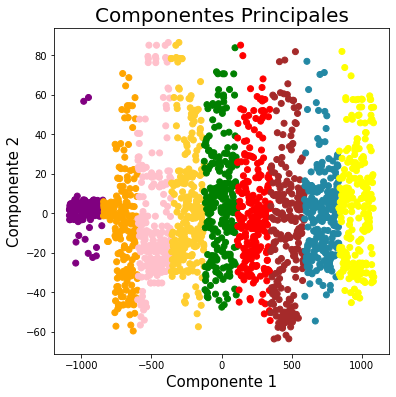

In [24]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20 )

color_theme = np.array(["#FFCE30","#2388A4","orange","red","purple","green","yellow","pink","brown","golden"])
ax.scatter(x = pca_nombres_music.Componentes_01, y = pca_nombres_music.Componente_02,
           c=color_theme[pca_nombres_music.Kmeans_Clusters])
plt.show()


In [25]:
mergedata_outfinal = mergedata_norms.drop(['danceability','energy','loudness','mode','valence','tempo','time_signature', 'level_0'], axis=1)
# # mergedata_outfinal.drop([range(1,2),axis=1)
mergedata_outfinalk = mergedata
mergedata_outfinalk['Kmeans'] = mergedata_outfinal
mergedata_outfinalk



 


,level_0,index,Unnamed: 0,X,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,sourcefilename,Kmeans
0,0,0,1,0,0.542,0.659,8,-7.289,1,0.0389,...,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,4,https://raw.githubusercontent.com/Benjamilior/...,4
1,1,1,2,1,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,https://raw.githubusercontent.com/Benjamilior/...,4
2,2,2,3,2,0.613,0.783,1,-6.736,1,0.1380,...,117.952,audio_features,0h5ddpn03JPxD4x4dMf8i0,spotify:track:0h5ddpn03JPxD4x4dMf8i0,https://api.spotify.com/v1/tracks/0h5ddpn03JPx...,https://api.spotify.com/v1/audio-analysis/0h5d...,138308,4,https://raw.githubusercontent.com/Benjamilior/...,4
3,3,3,4,3,0.848,0.821,2,-5.408,0,0.0527,...,125.051,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,https://raw.githubusercontent.com/Benjamilior/...,4
4,4,4,5,4,0.754,0.763,7,-4.627,0,0.0435,...,117.953,audio_features,18asYwWugKjjsihZ0YvRxO,spotify:track:18asYwWugKjjsihZ0YvRxO,https://api.spotify.com/v1/tracks/18asYwWugKjj...,https://api.spotify.com/v1/audio-analysis/18as...,164819,4,https://raw.githubusercontent.com/Benjamilior/...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,2168,162,163,62,0.706,0.739,4,-5.055,0,0.0962,...,87.790,audio_features,3kdgsWJBpqqHL3wyQGl26t,spotify:track:3kdgsWJBpqqHL3wyQGl26t,https://api.spotify.com/v1/tracks/3kdgsWJBpqqH...,https://api.spotify.com/v1/audio-analysis/3kdg...,389168,4,https://raw.githubusercontent.com/Benjamilior/...,6
2169,2169,163,164,63,0.518,0.820,5,-4.268,1,0.1620,...,168.148,audio_features,2y9oZ18fhOTkHjOhbHbqEI,spotify:track:2y9oZ18fhOTkHjOhbHbqEI,https://api.spotify.com/v1/tracks/2y9oZ18fhOTk...,https://api.spotify.com/v1/audio-analysis/2y9o...,209416,4,https://raw.githubusercontent.com/Benjamilior/...,6
2170,2170,164,165,64,0.732,0.807,10,-3.424,0,0.1160,...,176.026,audio_features,6NfC2FKfsfzuLIF4lThw0A,spotify:track:6NfC2FKfsfzuLIF4lThw0A,https://api.spotify.com/v1/tracks/6NfC2FKfsfzu...,https://api.spotify.com/v1/audio-analysis/6NfC...,226379,4,https://raw.githubusercontent.com/Benjamilior/...,6
2171,2171,165,166,65,0.812,0.855,7,-3.725,1,0.0554,...,90.040,audio_features,48AJSd42lXpicsGqcgopof,spotify:track:48AJSd42lXpicsGqcgopof,https://api.spotify.com/v1/tracks/48AJSd42lXpi...,https://api.spotify.com/v1/audio-analysis/48AJ...,192477,4,https://raw.githubusercontent.com/Benjamilior/...,6


# Creando la Playlist

# Jerarquico


In [43]:
rjson6
index = ['0']
ke = ['0']
X = ['0']
rjson6['index'] = X
rjson6['Unnamed: 0'] = ke
rjson6['X'] = X
rjson6['sourcefilename'] = "Cualquier cosa"
rjson6["level_0"] = "32"
nombre_columnas = ['level_0','index', 'Unnamed: 0','X','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','type','id','uri','track_href', 'analysis_url','duration_ms','time_signature','sourcefilename']
rjson6 = rjson6[nombre_columnas]
rjson7 = rjson6
rjson7

,level_0,index,Unnamed: 0,X,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,sourcefilename
0,32,0,0,0,0.727,0.681,5,-7.114,0,0.0265,...,0.448,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,Cualquier cosa


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline
#Lista va de 0 - 15 
url_song = ['https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/Song_01.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/Song_02.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_03.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_04.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_05.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song06.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song07.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song08.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song09.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song10.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song11.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song12.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song13.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song14.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song15.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song16.csv']
#Merge CSV
mergedataj = pd.concat(pd.read_csv(url_song).assign(sourcefilename = url_song)for url_song in url_song)
mergedataj = mergedataj.reset_index()
mergedata = pd.concat([mergedata, rjson7])
mergedata

,level_0,index,Unnamed: 0,X,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,sourcefilename,Kmeans
0,0.0,0,1,0,0.542,0.659,8,-7.289,1,0.0389,...,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,4,https://raw.githubusercontent.com/Benjamilior/...,4.0
1,1.0,1,2,1,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,https://raw.githubusercontent.com/Benjamilior/...,4.0
2,2.0,2,3,2,0.613,0.783,1,-6.736,1,0.1380,...,117.952,audio_features,0h5ddpn03JPxD4x4dMf8i0,spotify:track:0h5ddpn03JPxD4x4dMf8i0,https://api.spotify.com/v1/tracks/0h5ddpn03JPx...,https://api.spotify.com/v1/audio-analysis/0h5d...,138308,4,https://raw.githubusercontent.com/Benjamilior/...,4.0
3,3.0,3,4,3,0.848,0.821,2,-5.408,0,0.0527,...,125.051,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,https://raw.githubusercontent.com/Benjamilior/...,4.0
4,4.0,4,5,4,0.754,0.763,7,-4.627,0,0.0435,...,117.953,audio_features,18asYwWugKjjsihZ0YvRxO,spotify:track:18asYwWugKjjsihZ0YvRxO,https://api.spotify.com/v1/tracks/18asYwWugKjj...,https://api.spotify.com/v1/audio-analysis/18as...,164819,4,https://raw.githubusercontent.com/Benjamilior/...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,0,0,0,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,Cualquier cosa,NaN
0,NaN,0,0,0,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,Cualquier cosa,NaN
0,NaN,0,0,0,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,Cualquier cosa,NaN
0,32,0,0,0,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,Cualquier cosa,NaN


In [34]:
mergedata_outstrj = mergedataj.drop(['time_signature','sourcefilename', 'analysis_url','track_href','uri','id','type','index','Unnamed: 0','X','duration_ms','speechiness','acousticness','instrumentalness','liveness','key','loudness','mode','valence','tempo'], axis=1)


In [35]:
mergedata_array = mergedata_outstrj.iloc[:,[0,1]].values
mergedata_array

array([[0.542, 0.659],
       [0.727, 0.681],
       [0.613, 0.783],
       ...,
       [0.518, 0.82 ],
       [0.732, 0.807],
       [0.812, 0.855]])

Creando Dendograma

In [36]:
clustering_jerarquico = linkage(mergedata_array, 'ward')


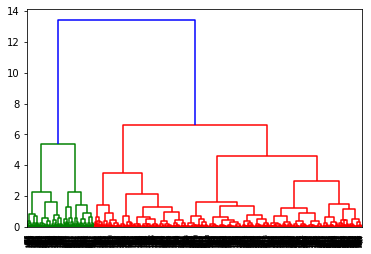

In [37]:
dendrogram=sch.dendrogram(clustering_jerarquico)

In [38]:
clusters = fcluster(clustering_jerarquico, t=3, criterion='distance')
clusters

array([3, 6, 4, ..., 4, 5, 5], dtype=int32)

In [39]:
mergedata_outstrj["Clustering Jerarquico"] = clusters
mergedata_outstrj

,danceability,energy,Clustering Jerarquico
0,0.542,0.659,3
1,0.727,0.681,6
2,0.613,0.783,4
3,0.848,0.821,5
4,0.754,0.763,5
...,...,...,...
2167,0.886,0.482,6
2168,0.706,0.739,6
2169,0.518,0.820,4
2170,0.732,0.807,5


In [40]:
mergedata_finalj = mergedata_outstrj.drop(['energy','danceability'], axis=1)
mergedataj['Jerarquico'] = mergedata_finalj
mergedataj

,index,Unnamed: 0,X,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,sourcefilename,Jerarquico
0,0,1,0,0.542,0.659,8,-7.289,1,0.0389,0.00279,...,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,4,https://raw.githubusercontent.com/Benjamilior/...,3
1,1,2,1,0.727,0.681,5,-7.114,0,0.0265,0.00214,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,https://raw.githubusercontent.com/Benjamilior/...,6
2,2,3,2,0.613,0.783,1,-6.736,1,0.1380,0.02440,...,117.952,audio_features,0h5ddpn03JPxD4x4dMf8i0,spotify:track:0h5ddpn03JPxD4x4dMf8i0,https://api.spotify.com/v1/tracks/0h5ddpn03JPx...,https://api.spotify.com/v1/audio-analysis/0h5d...,138308,4,https://raw.githubusercontent.com/Benjamilior/...,4
3,3,4,3,0.848,0.821,2,-5.408,0,0.0527,0.01690,...,125.051,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,https://raw.githubusercontent.com/Benjamilior/...,5
4,4,5,4,0.754,0.763,7,-4.627,0,0.0435,0.03010,...,117.953,audio_features,18asYwWugKjjsihZ0YvRxO,spotify:track:18asYwWugKjjsihZ0YvRxO,https://api.spotify.com/v1/tracks/18asYwWugKjj...,https://api.spotify.com/v1/audio-analysis/18as...,164819,4,https://raw.githubusercontent.com/Benjamilior/...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,161,162,61,0.886,0.482,7,-9.882,1,0.1750,0.39600,...,124.956,audio_features,3HQxzXOb4p9pfpD5gP38D5,spotify:track:3HQxzXOb4p9pfpD5gP38D5,https://api.spotify.com/v1/tracks/3HQxzXOb4p9p...,https://api.spotify.com/v1/audio-analysis/3HQx...,232560,4,https://raw.githubusercontent.com/Benjamilior/...,6
2168,162,163,62,0.706,0.739,4,-5.055,0,0.0962,0.17600,...,87.790,audio_features,3kdgsWJBpqqHL3wyQGl26t,spotify:track:3kdgsWJBpqqHL3wyQGl26t,https://api.spotify.com/v1/tracks/3kdgsWJBpqqH...,https://api.spotify.com/v1/audio-analysis/3kdg...,389168,4,https://raw.githubusercontent.com/Benjamilior/...,6
2169,163,164,63,0.518,0.820,5,-4.268,1,0.1620,0.27100,...,168.148,audio_features,2y9oZ18fhOTkHjOhbHbqEI,spotify:track:2y9oZ18fhOTkHjOhbHbqEI,https://api.spotify.com/v1/tracks/2y9oZ18fhOTk...,https://api.spotify.com/v1/audio-analysis/2y9o...,209416,4,https://raw.githubusercontent.com/Benjamilior/...,4
2170,164,165,64,0.732,0.807,10,-3.424,0,0.1160,0.44500,...,176.026,audio_features,6NfC2FKfsfzuLIF4lThw0A,spotify:track:6NfC2FKfsfzuLIF4lThw0A,https://api.spotify.com/v1/tracks/6NfC2FKfsfzu...,https://api.spotify.com/v1/audio-analysis/6NfC...,226379,4,https://raw.githubusercontent.com/Benjamilior/...,5


In [61]:
mergedata_outfinalk['Kmeans'][2172]
#CAMBIAR EN CASO DE QUE EL DATA FRAME CAMBIE LA CANTIDAD DE DATOS


4

In [ ]:
mergedata_outfinalk[mergedata_outfinalk['Kmeans']==mergedata_outfinalk['Kmeans'][2172]]